# Fields Academy | Western University
### Neural Networks, Assignment 1
### Evan Callaghan
### Feb 15, 2023

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import islice
import matplotlib.pyplot as plt

### Problem 1. Part c)

Text(0, 0.5, 'x')

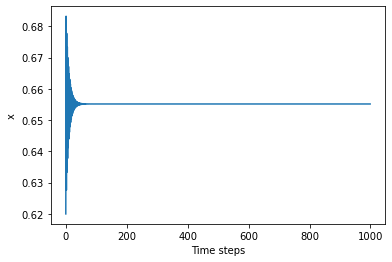

In [162]:
## Defining parameters
a = 2.9; x0 = 0.62; nsteps = 1000;

## Initializing an array of zeros
x = np.zeros(nsteps); x[0] = x0;

## Running simulation
for ii in np.arange(1,nsteps): 
    x[ii] = a * x[ii-1] * (1 - x[ii-1])

# plot results
plt.plot(x); plt.xlabel('Time steps'); plt.ylabel('x')

### Problem 1. Part d)

In [164]:
## Defining range of a values
a_range = np.arange(3.4, 3.86, 0.05)

## Setting the number of iterations
nsteps = 600

## Initializing an array with x_0 = 0.5
x = np.zeros(nsteps); x[0] = 0.5

## Initializing a dataframe to store results
res = pd.DataFrame(columns = ['a', 'value'])

## Considerng the logistic map for all values of a:
for i, a in enumerate(a_range):
    
    for j in np.arange(1, nsteps):
        
        x[j] = a * x[j-1] * (1 - x[j-1])
    
    ## Extracting unique values from the last 300 entries
    unique = np.unique(x[300:])
    
    ## Storing unique values from most recent iteration
    new = pd.DataFrame({'a': np.repeat(a, len(unique)), 'value': unique})
    
    ## Appending to results
    res = pd.concat([res, new], ignore_index = True)

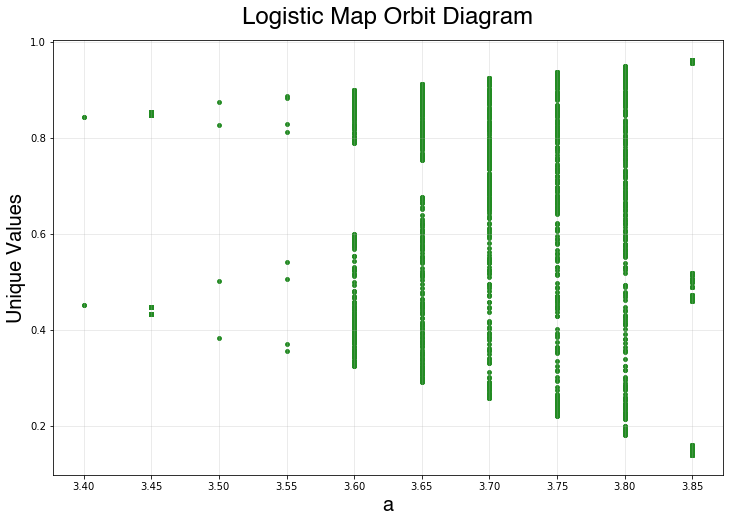

In [168]:
## Plotting res dataframe
plt.figure(figsize = (12, 8)) 
plt.scatter(res['a'], res['value'], marker = '.', color = 'forestgreen', s = 60, alpha = 1)
plt.title('Logistic Map Orbit Diagram', size = 24, fontweight = 'semibold', pad = 16, fontname = 'Helvetica')
plt.xlabel('a', size = 20, style = 'italic', fontname = 'Helvetica')
plt.ylabel('Unique Values', size = 20, style = 'italic', fontname = 'Helvetica')
plt.xticks(a_range) 
plt.grid(alpha = 0.3)
plt.show()

In [169]:
## Defining range of a values
a_range = np.arange(2.8, 3.99, 0.001)

## Setting the number of iterations
nsteps = 600

## Initializing an array with x_0 = 0.5
x = np.zeros(nsteps); x[0] = 0.5

## Initializing a dataframe to store results
res = pd.DataFrame(columns = ['a', 'value'])

## Considerng the logistic map for all values of a:
for i, a in enumerate(a_range):
    
    for j in np.arange(1, nsteps):
        
        x[j] = a * x[j-1] * (1 - x[j-1])
    
    ## Extracting unique values from the last 300 entries
    unique = np.unique(x[300:])
    
    ## Storing unique values from most recent iteration
    new = pd.DataFrame({'a': np.repeat(a, len(unique)), 'value': unique})
    
    ## Appending to results
    res = pd.concat([res, new], ignore_index = True)

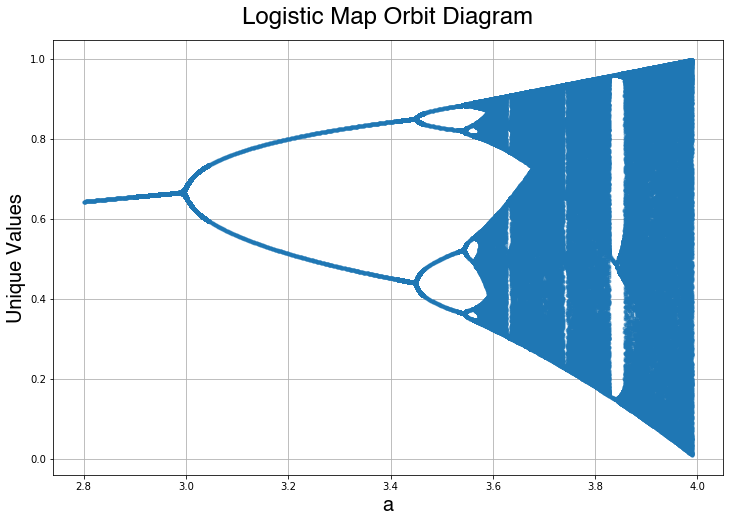

In [175]:
## Plotting res dataframe
plt.figure(figsize = (12, 8)) 
plt.plot('a', 'value', data = res, linestyle = 'none', marker = '.', alpha = 0.5)
plt.title('Logistic Map Orbit Diagram', size = 24, fontweight = 'semibold', pad = 16, fontname = 'Helvetica')
plt.xlabel('a', size = 20, fontname = 'Helvetica', style = 'italic')
plt.ylabel('Unique Values', size = 20, fontname = 'Helvetica', style = 'italic')
plt.grid()
plt.show()

### ----------------------------------------------------

## Problem 2. b)

#### Defining functions for Quadratic Integrate-and-Fire model:

In [176]:
## Setting time components
dt = 0.00001
T = 10
time = np.linspace(dt,T,int(T/dt))

## Initializion function
def initialize_simulation():
    V = np.zeros(time.size)
    spikes = np.zeros(time.size)
    V[0] = V0
    return V, spikes

## Function for plotting spike activity
def plot_V(time, V, timeSpikes):
    plt.figure(figsize = (12, 6))
    plt.plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'ro', linewidth=2)
    plt.ylabel('V(t)', size = 20, style = 'italic', fontname = 'Helvetica')
    plt.xlabel('time (seconds)', size = 20, style = 'italic', fontname = 'Helvetica')
    plt.grid()

## Euler method implementation for integration
def integrate_and_fire(V, spikes, i, I):
    dV = V[i-1]**2 + I
    V[i] = (dV*dt) + V[i-1]
    if (V[i] >= V_peak):
        V[i] = V_reset
        spikes[i] = 1
    return V, spikes

#### i. Plotting dV/dt against V and locating Vrest and Vthres when I < 0 and I > 0.

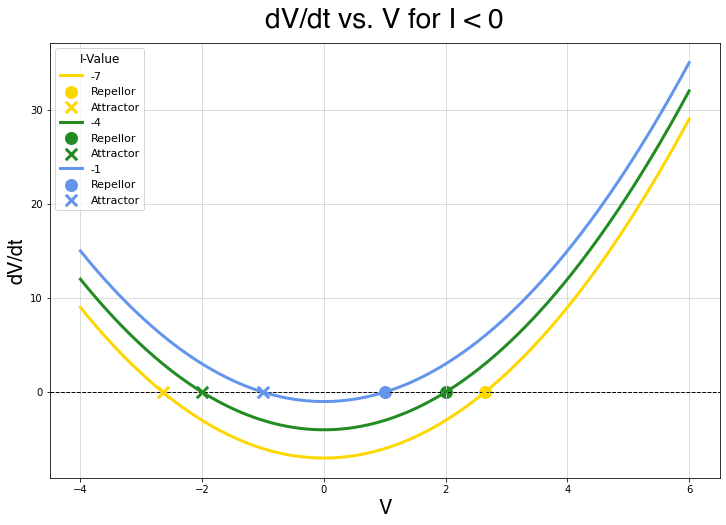

In [177]:
V = np.arange(-4, 6, 0.001)
I_vals = np.array([-7, -4, -1])
palette = ['gold', 'forestgreen', 'cornflowerblue']
plt.figure(figsize = (12, 8))
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)

for i, I in enumerate(I_vals):
    dV_dt = V**2 + I
    plt.plot(V, dV_dt, marker = '', color = palette[i], label = I, linewidth = 3)
    plt.scatter([np.sqrt(np.abs(I))], [0], marker='o', s = 100, color = palette[i], label = 'Repellor', linewidth = 3)
    plt.scatter([-np.sqrt(np.abs(I))], [0], marker='x', s = 130, color = palette[i], label = 'Attractor', linewidth = 3)
    
plt.title('dV/dt vs. V for I < 0', size = 28, fontweight = 'bold', pad = 16, fontname = 'Helvetica')
plt.xlabel('V', size = 20, style = 'italic', fontname = 'Helvetica')
plt.ylabel('dV/dt', size = 20, style = 'italic', fontname = 'Helvetica')
plt.grid(color = 'lightgrey')
plt.legend(title = 'I-Value', fontsize = 11, loc = 'upper left', title_fontsize = 'large')
plt.show()

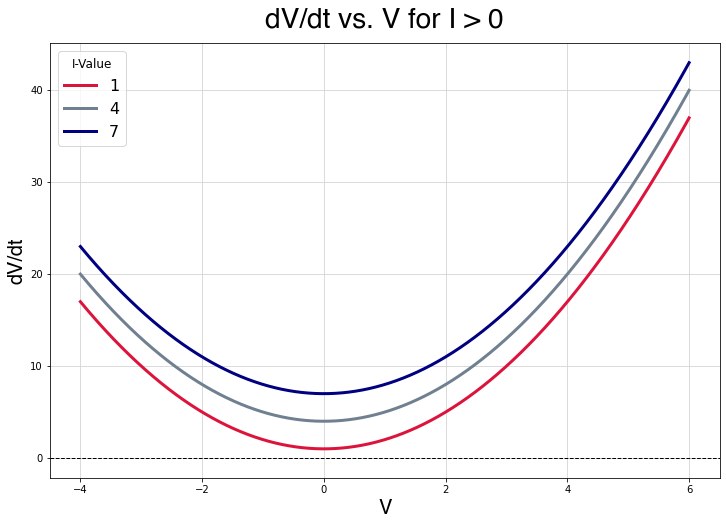

In [178]:
V = np.arange(-4, 6, 0.001)
I_vals = np.array([1, 4, 7])
palette = ['crimson', 'slategrey', 'navy']
plt.figure(figsize = (12, 8))
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)

for i, I in enumerate(I_vals):
    dV_dt = V**2 + I
    plt.plot(V, dV_dt, marker = '', color = palette[i], label = I, linewidth = 3)
    
plt.title('dV/dt vs. V for I > 0', size = 28, fontweight = 'bold', pad = 16, fontname = 'Helvetica')
plt.xlabel('V', size = 20, style = 'italic', fontname = 'Helvetica')
plt.ylabel('dV/dt', size = 20, style = 'italic', fontname = 'Helvetica')
plt.grid(color = 'lightgrey')
plt.legend(title = 'I-Value', fontsize = 16, loc = 'upper left', title_fontsize = 'large')
plt.show()

#### ii. A: Using the implementation of Euler’s method to numerically integrate and simulate the QIF with Vreset = Vthres ± ε.

Text(0.5, 1.0, 'Firing Activity Simulation')

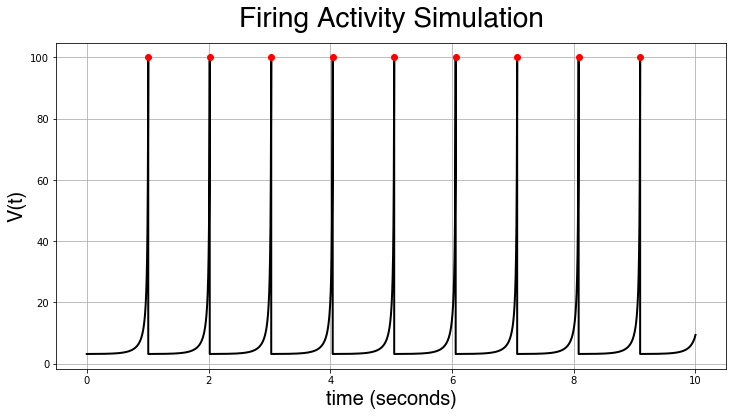

In [91]:
## Setting parameter values
I = -10
ebs = 0.01
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = V_thres + ebs
V_peak = 100
V0 = V_thres + ebs

## Initializing V and spikes
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time),1,None):
    
    V, spikes = integrate_and_fire(V, spikes, i, I)

## Assigning peak value when spike occurred
V[spikes==1] = V_peak

## Plotting V(t)
plot_V(time, V, time[spikes==1])
plt.title('Firing Activity Simulation', size = 28, fontweight = 'bold', pad = 16, fontname = 'Helvetica')

#### ii. B: Using the implementation of Euler’s method to numerically integrate and simulate the QIF with Vreset = Vrest ± ε.

Text(0.5, 1.0, 'Firing Activity Simulation')

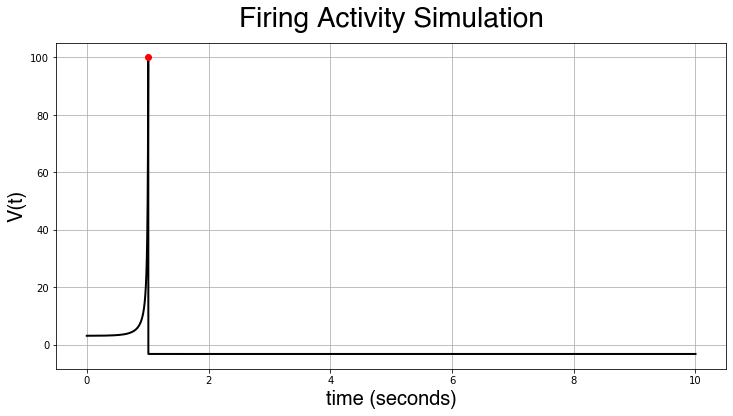

In [179]:
## Setting parameter values
I = -10
ebs = 0.01
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = V_rest + ebs
V_peak = 100
V0 = V_thres + ebs

## Initializing V and spikes
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time),1,None):
    
    V, spikes = integrate_and_fire(V, spikes, i, I)

## Assigning peak value when spike occurred
V[spikes==1] = V_peak

## Plotting V(t)
plot_V(time, V, time[spikes==1])
plt.title('Firing Activity Simulation', size = 28, fontweight = 'bold', pad = 16, fontname = 'Helvetica')

#### Doing the same simulation with simulate the QIF with Vreset = Vrest ± ε but V0 < Vthres.

Text(0.5, 1.0, 'Firing Activity Simulation')

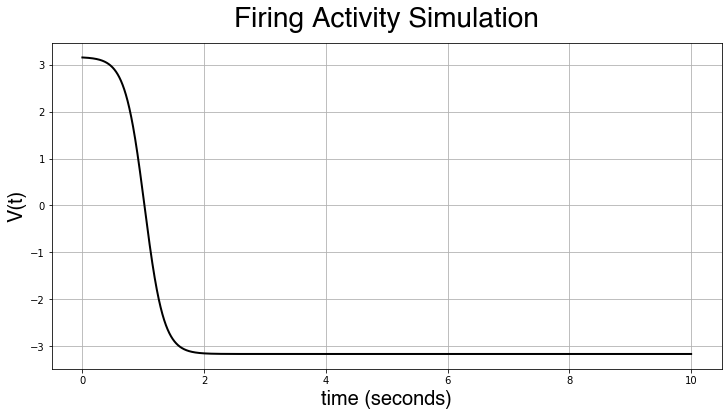

In [180]:
## Setting parameter values
I = -10
ebs = 0.01
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = V_rest + ebs
V_peak = 100
V0 = V_thres - ebs

## Initializing V and spikes
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time),1,None):
    
    V, spikes = integrate_and_fire(V, spikes, i, I)

## Assigning peak value when spike occurred
V[spikes==1] = V_peak

## Plotting V(t)
plot_V(time, V, time[spikes==1])
plt.title('Firing Activity Simulation', size = 28, fontweight = 'bold', pad = 16, fontname = 'Helvetica')

#### iii. Using I = 10 to simulate the QIF for 10 seconds with any initial condition.

Text(0.5, 1.0, 'Simulating with V0 = 5')

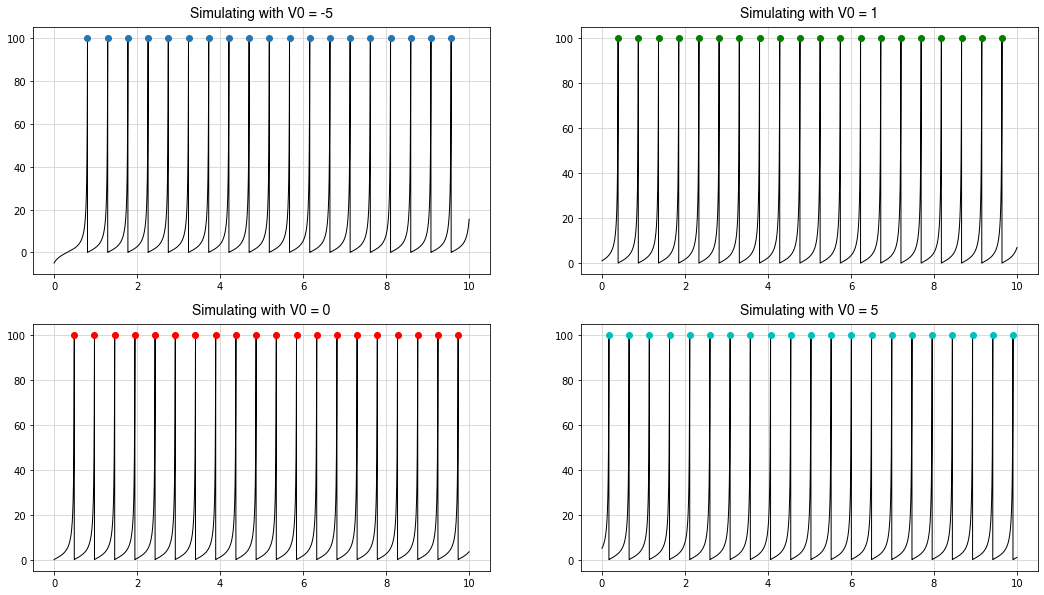

In [152]:
## Setting parameter values
I = 10
ebs = 0.01
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = 0
V_peak = 100

## Initializing plot
fig, axs = plt.subplots(2, 2, figsize = ((18, 10)))

## V0 = -5
V0 = -5
V, spikes = initialize_simulation()
for i, t in islice(enumerate(time),1,None):
    V, spikes = integrate_and_fire(V, spikes, i, I)
V[spikes==1] = V_peak
timeSpikes = time[spikes==1]
axs[0, 0].plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'o', linewidth=1)
axs[0, 0].grid(color = 'lightgrey')
axs[0, 0].set_title('Simulating with V0 = -5', size = 14, pad = 10, fontname = 'Helvetica')

## V0 = 0
V0 = 0
V, spikes = initialize_simulation()
for i, t in islice(enumerate(time),1,None):
    V, spikes = integrate_and_fire(V, spikes, i, I)
V[spikes==1] = V_peak
timeSpikes = time[spikes==1]
axs[1, 0].plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'ro', linewidth=1)
axs[1, 0].grid(color = 'lightgrey')
axs[1, 0].set_title('Simulating with V0 = 0', size = 14, pad = 10, fontname = 'Helvetica')

## V0 = 1
V0 = 1
V, spikes = initialize_simulation()
for i, t in islice(enumerate(time),1,None):
    V, spikes = integrate_and_fire(V, spikes, i, I)
V[spikes==1] = V_peak
timeSpikes = time[spikes==1]
axs[0, 1].plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'go', linewidth=1)
axs[0, 1].grid(color = 'lightgrey')
axs[0, 1].set_title('Simulating with V0 = 1', size = 14, pad = 10, fontname = 'Helvetica')

## V0 = 5
V0 = 5
V, spikes = initialize_simulation()
for i, t in islice(enumerate(time),1,None):
    V, spikes = integrate_and_fire(V, spikes, i, I)
V[spikes==1] = V_peak
timeSpikes = time[spikes==1]
axs[1, 1].plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'co', linewidth=1)
axs[1, 1].grid(color = 'lightgrey')
axs[1, 1].set_title('Simulating with V0 = 5', size = 14, pad = 10, fontname = 'Helvetica')

## Problem 2. c)

#### Computationally validating the firing rate value when I = 10, Vpeak, = 100 and with time step = 0.00001 for 10 seconds.

In [185]:
## Setting parameter values
I = 10
V_reset = 0
V_peak = 100
V0 = V_reset

## Defining firing rate function
def firing_rate():
    T = (1/np.sqrt(I)) * (np.arctan(V_peak/np.sqrt(I)) - np.arctan(V_reset/np.sqrt(I)))
    return 1/T

## Initializing
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time),1,None):
    
    V, spikes = integrate_and_fire(V, spikes, i, I)
    
    ## If spike occurred in this iteration, break the loop and exit;
    if spikes[i] == 1: break

## Saving spike time 
firing_period = time[spikes==1][0]

print(time[spikes==1][0])

## Printing results
print('Observed Firing Rate:', np.round(1/firing_period, 7), 'seconds.')
print('Theoretical Firing Rate:', np.round(firing_rate(), 7), 'seconds.')

0.4867804867709736
Observed Firing Rate: 2.0543141 seconds.
Theoretical Firing Rate: 2.0545156 seconds.
